In [1]:
## [Human Resource Attrition] Data Analysis
# [경영 데이터 분석2 with R ~ Python] clustering_KNN

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import missingno as msno

HRA = pd.read_csv("C:\RDA02/attrition_CA.csv", index_col = 0)

'''
    file = open(
        "C:\RDA02/attrition_CA.csv",
        "r", encoding = "UTF-8")
    reader = csv.reader( file )
    for line in reader:
        print( line )
    file.close()
    
    writer = csv.writer( file )
    writer.writerow( [list] )
    file.close()
'''

'\n    file = open(\n        "C:\\RDA02/attrition_CA.csv",\n        "r", encoding = "UTF-8")\n    reader = csv.reader( file )\n    for line in reader:\n        print( line )\n    file.close()\n    \n    writer = csv.writer( file )\n    writer.writerow( [list] )\n    file.close()\n'

In [2]:
HRA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14997 entries, 1 to 14999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   left          14997 non-null  int64  
 1   satisfaction  14997 non-null  float64
 2   evaluation    14997 non-null  float64
 3   projects      14997 non-null  int64  
 4   hours         14997 non-null  int64  
 5   years         14997 non-null  int64  
 6   accident      14997 non-null  int64  
 7   promotion     14997 non-null  int64  
 8   department    14997 non-null  object 
 9   salary        14997 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.3+ MB


In [3]:
HRA.columns
HRA.index
HRA.shape

(14997, 10)

C:\Users\sooyeon Kang\anaconda3\lib\site-packages\scipy\cluster\hierarchy.py:2844: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  ax.set_ylim([dvw, 0])


<AxesSubplot:>

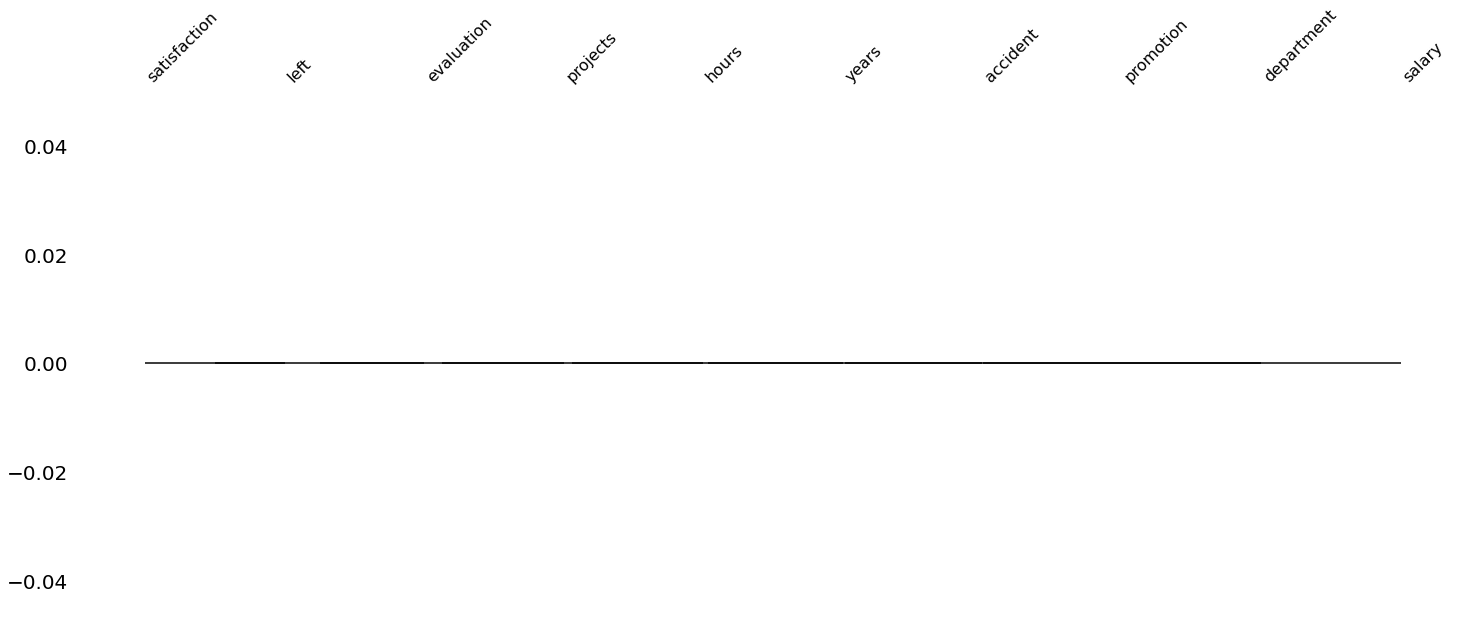

In [4]:
HRA.isnull().sum()
msno.dendrogram(HRA)
    # [결측값 탐색] NA's 0

In [5]:
HRA["accident"] = HRA["accident"].astype("category")
HRA["promotion"] = HRA["promotion"].astype("category")
HRA["department"] = HRA["department"].astype("category")
HRA["salary"] = HRA["salary"].astype("category")
HRA["left"] = HRA["left"].astype("category")
HRA["accident"].dtype
    # [데이터 타입 정수형 ~ 범주형 변환]

CategoricalDtype(categories=[0, 1], ordered=False)

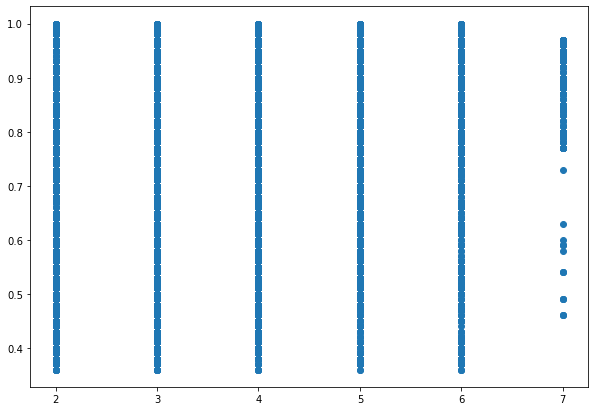

In [6]:
plt.figure(figsize = (10, 7))
plt.scatter(x = HRA["projects"], y = HRA["evaluation"])
plt.show()
    # [project와 evaluation의 산점도]

In [7]:
# Hierarchy Clustering

HRA["department"].unique()
HRA_hr = HRA.loc[HRA.department == "hr", :]
    # [step1: 하위 데이터프레임 작성]

In [8]:
HRA_hr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 739 entries, 32 to 14979
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   left          739 non-null    category
 1   satisfaction  739 non-null    float64 
 2   evaluation    739 non-null    float64 
 3   projects      739 non-null    int64   
 4   hours         739 non-null    int64   
 5   years         739 non-null    int64   
 6   accident      739 non-null    category
 7   promotion     739 non-null    category
 8   department    739 non-null    category
 9   salary        739 non-null    category
dtypes: category(5), float64(2), int64(3)
memory usage: 39.1 KB


In [9]:
HRA_hr["salary"].unique()
    # [step2 : 더미변수 만들고 불필요한 변수 제거]

['low', 'medium', 'high']
Categories (3, object): ['high', 'low', 'medium']

In [10]:
def dummy_coding_low(HRA_hr):
    if HRA_hr["salary"] == "low": return 1
    else: return 0
def dummy_coding_med(HRA_hr):
    if HRA_hr["salary"] == "medium": return 1
    else: return 0

HRA_hr["medium"] = HRA_hr.apply(dummy_coding_med, axis = 1)
HRA_hr["low"] = HRA_hr.apply(dummy_coding_low, axis = 1)
# HRA_hr

C:\Users\SOOYEO~1\AppData\Local\Temp/ipykernel_17544/768404700.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  HRA_hr["medium"] = HRA_hr.apply(dummy_coding_med, axis = 1)
C:\Users\SOOYEO~1\AppData\Local\Temp/ipykernel_17544/768404700.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  HRA_hr["low"] = HRA_hr.apply(dummy_coding_low, axis = 1)


In [11]:
HRA_hr = HRA_hr.drop("department", axis = 1)
HRA_hr = HRA_hr.drop("salary", axis = 1)
# HRA_hr.drop("id", axis = 1)
    # [범주형 척도로 측정되고, 범주 개수가 3개 이상인 변수를 더미변수로 변경]

In [12]:
from scipy.spatial import distance # distance.euclidean(x, y)
from math import dist # dist(x, y)
from sklearn.neighbors import DistanceMetric 
    # s1 = DistanceMetric.get_metric("manhattan").pairwise( HRA_hr[["satisfaction"]] )
    # s2 = DistanceMetric.get_metric('manhattan').pairwise( HRA_hr[["evaluation"]] )
    # s3 = DistanceMetric.get_metric("dice").pairwise( HRA_hr[["medium"]] )
    # Gowers_Distance = (s1*w1 + s2 *w2 + s3*w3) / (w1 + w2 + w3)

HRA_hr["accident"] = HRA_hr["accident"].astype("bool")
HRA_hr["left"] = HRA_hr["left"].astype("bool")
HRA_hr["promotion"] = HRA_hr["promotion"].astype("bool")
HRA_hr["medium"] = HRA_hr["medium"].astype("bool")
HRA_hr["low"] = HRA_hr["low"].astype("bool")
HRA_hr.info()
import gower
    # [gower's similarity or coefficient] 
    # 계량형 척도는 Manhattan_비계량형 척도는 dice distance
gower = gower.gower_matrix(HRA_hr)[0]
    # [step3: 사례 간 거리 구하기] 
    # [TypeError] Cannot interpret 'CategoricalDtype(categories=[0, 1], ordered=False)' as a data type
                # HRA_hr.select_dtypes(exclude = ["category"] 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 739 entries, 32 to 14979
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   left          739 non-null    bool   
 1   satisfaction  739 non-null    float64
 2   evaluation    739 non-null    float64
 3   projects      739 non-null    int64  
 4   hours         739 non-null    int64  
 5   years         739 non-null    int64  
 6   accident      739 non-null    bool   
 7   promotion     739 non-null    bool   
 8   medium        739 non-null    bool   
 9   low           739 non-null    bool   
dtypes: bool(5), float64(2), int64(3)
memory usage: 38.2 KB


In [13]:
gower = pd.DataFrame(gower)
gower.describe()

,0
count,739.000000
mean,0.321022
std,0.134201
min,0.000000
25%,0.227200
50%,0.310650
75%,0.428488
max,0.761041


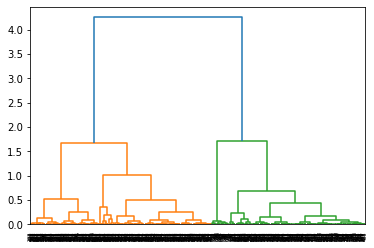

In [14]:
from scipy.cluster.hierarchy import linkage, dendrogram
import scipy.cluster.hierarchy as sch

Z = linkage(gower, method = "ward")
Z
dend = sch.dendrogram(Z)
    # [step4: 덴드로그램 작성]
    # [ward.D2 method로 오차제곱합이 최소인 군집 형성]

In [15]:
HRA_hr = HRA_hr.astype({"accident": int,
                       "left" : int,
                        "promotion" : int,
                        "medium" : int,
                        "low" : int})
    # gower's similarity가 아닌 euclidean similarity는 범주형을 연속형 변환해야 함    

from scipy.spatial.distance import pdist, squareform

euclidean = pd.DataFrame(squareform(pdist(HRA_hr, metric = "euclidean")))
euclidean
    # [step5 : 최적의 군집 수 k 산출]

,0,1,2,3,4,5,6,7,8,9,...,729,730,731,732,733,734,735,736,737,738
0,0.000000,11.000277,6.000033,112.059101,43.048317,21.047777,10.100020,155.058724,7.142024,7.142451,...,14.000586,104.019322,110.141637,20.050219,7.158575,25.020234,176.080013,2.452040,117.064973,10.100124
1,11.000277,0.000000,5.000410,101.065935,32.065959,10.099525,1.732772,144.063221,4.243018,18.055539,...,3.000417,93.021742,99.157350,9.110488,6.345116,14.035847,165.085337,9.110521,106.072068,1.732513
2,6.000033,5.000410,0.000000,106.062503,37.056309,15.066722,4.243442,149.061127,1.734387,13.077102,...,8.000800,98.020517,104.149844,14.071564,3.906405,19.026510,170.082862,4.243689,111.068536,4.243689
3,112.059101,101.065935,106.062503,0.000000,69.050828,91.084236,102.075110,43.111053,105.072988,119.064527,...,98.068246,8.551614,4.068317,92.083428,106.021396,87.082261,64.121400,110.069767,5.196278,102.075235
4,43.048317,32.065959,37.056309,69.050828,0.000000,22.050862,33.033898,112.046351,36.030888,50.022637,...,29.073624,61.033429,67.129544,23.048915,37.072410,18.089657,133.061559,41.027504,74.033846,33.034166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
734,25.020234,14.035847,19.026510,87.082261,18.089657,4.123518,15.033313,130.066451,18.028206,32.015660,...,11.045655,79.031908,85.177726,5.099804,19.373603,0.000000,151.090143,23.021785,92.077585,15.033383
735,176.080013,165.085337,170.082862,64.121400,133.061559,155.084429,166.078931,21.047653,169.077276,183.071568,...,162.086937,72.085084,66.007578,156.083814,170.014763,151.090143,0.000000,174.075249,59.114361,166.078874
736,2.452040,9.110521,4.243689,110.069767,41.027504,19.000011,8.000056,153.059598,5.000800,9.000006,...,12.083083,102.029677,108.135127,18.000050,5.412550,23.021785,174.075249,0.000000,115.057866,8.000000
737,117.064973,106.072068,111.068536,5.196278,74.033846,96.069234,107.062079,38.125036,110.060404,124.053699,...,103.074429,13.420350,7.713994,97.068615,111.011244,92.077585,59.114361,115.057866,0.000000,107.062190


C:\Users\sooyeon Kang\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


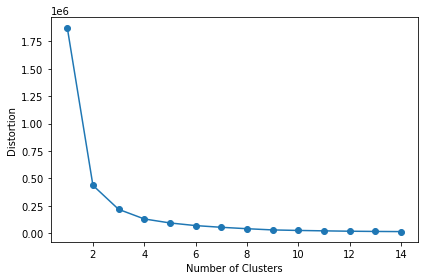

In [16]:
from sklearn.cluster import KMeans

distortions = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, init = "k-means++", n_init = 10, max_iter = 300, random_state = 0)
    kmeans.fit(HRA_hr)
    distortions.append(kmeans.inertia_)
    
plt.plot(range(1, 15), distortions, marker = "o")
plt.xlabel("Number of Clusters")
plt.ylabel("Distortion")
plt.tight_layout()
plt.show()
    # [step5: 최적의 군집 수 k 산출] k = 9

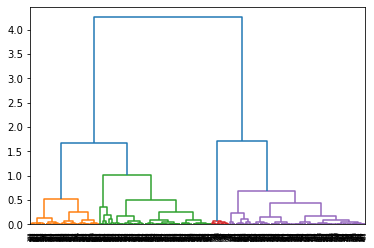

In [19]:
Z = sch.linkage(gower, method = "ward")
cutoff = 0.3*max(Z[:, 2])
dend = sch.dendrogram(Z, color_threshold = cutoff)
    # [step6: 최적의 군집 수 k = 9로 계층적 군집분석 수행]

In [34]:
from sklearn.cluster import AgglomerativeClustering

'''
[Error]
agc = AgglomerativeClustering(n_clusters = 9)
plt.figure(figsize = (8, 8))
plt.scatter(HRA_hr["medium"], HRA_hr["satisfaction"], euclidean, c = agc.fit_predict(Z), cmap ='rainbow')
plt.title("Agglomerative Hierarchical Clusters - Scatter Plot", fontsize=18)
plt.show()
'''

Hclust = AgglomerativeClustering(n_clusters = 9, affinity = "euclidean", linkage = "average")
Hclust.fit(HRA_hr)
Hclust.labels_

array([8, 8, 8, 7, 6, 1, 8, 2, 8, 8, 2, 8, 1, 1, 7, 5, 8, 5, 8, 8, 8, 7,
       2, 4, 1, 8, 8, 4, 1, 4, 3, 5, 1, 7, 8, 7, 8, 2, 2, 5, 8, 4, 7, 1,
       7, 7, 7, 5, 8, 7, 2, 1, 1, 1, 8, 5, 5, 5, 8, 8, 3, 8, 8, 1, 8, 8,
       8, 1, 5, 2, 2, 1, 7, 1, 1, 7, 8, 2, 7, 8, 2, 8, 5, 7, 8, 2, 7, 8,
       7, 2, 4, 2, 2, 8, 8, 5, 8, 8, 1, 1, 8, 8, 8, 1, 1, 7, 1, 8, 1, 2,
       8, 7, 8, 4, 4, 3, 1, 3, 3, 3, 1, 3, 8, 8, 4, 7, 6, 3, 1, 3, 7, 3,
       6, 5, 6, 5, 1, 4, 8, 5, 1, 3, 4, 6, 5, 1, 3, 4, 3, 1, 5, 7, 5, 8,
       7, 6, 6, 4, 8, 8, 7, 1, 6, 4, 0, 7, 1, 3, 1, 7, 0, 5, 5, 6, 7, 6,
       6, 8, 7, 5, 1, 4, 8, 6, 7, 5, 4, 1, 4, 7, 3, 3, 1, 4, 4, 8, 7, 1,
       5, 5, 5, 8, 4, 6, 3, 3, 3, 7, 4, 3, 5, 5, 7, 6, 1, 3, 5, 5, 8, 6,
       0, 7, 1, 3, 4, 4, 1, 0, 8, 3, 1, 6, 4, 4, 8, 7, 6, 1, 3, 5, 5, 5,
       7, 4, 5, 6, 5, 7, 7, 4, 0, 3, 8, 6, 5, 4, 3, 7, 8, 5, 1, 5, 4, 8,
       4, 7, 1, 1, 3, 0, 6, 5, 7, 8, 7, 3, 6, 4, 3, 3, 7, 5, 6, 5, 4, 1,
       5, 1, 4, 1, 6, 6, 7, 2, 3, 5, 3, 7, 4, 1, 3,

In [42]:
HRA_hr["hcluster"] = Hclust.labels_
HRA_hr["hcluster"].unique()

array([8, 7, 6, 1, 2, 5, 4, 3, 0], dtype=int64)

In [48]:
HRA_hr["hcluster"] = HRA_hr["hcluster"].astype("category")
type(HRA_hr["hcluster"])
HRA_hr.head()

,left,satisfaction,evaluation,projects,hours,years,accident,promotion,medium,low,hcluster
id,,,,,,,,,,,
32,1,0.45,0.57,2,134,3,0,0,0,1,8
33,1,0.40,0.51,2,145,3,0,0,0,1,8
34,1,0.45,0.55,2,140,3,0,0,0,1,8
35,1,0.84,0.87,4,246,6,0,0,0,1,7
109,1,0.71,0.87,3,177,4,0,0,1,0,6


In [55]:
# K-means clustering

feature_kclust = [
    "satisfaction", "evaluation", "projects", "hours", "years"
] 
    # [step1: 연속형 변수만 추출하여 군집 형성]

from sklearn.preprocessing import MinMaxScaler
'''
from pyspark.ml.feature import StandardScaler
scaler = StandardScaler(inputCol="features", outputCol="scaledFeatures", withStd=True, withMean=False)
'''

scaler = MinMaxScaler()
HRA_hr.iloc[:, 1:5] = scaler.fit_transform(HRA_hr.iloc[:, 1:5])
    # [step2: 변수의 표준화]
HRA_hr.head()

,left,satisfaction,evaluation,projects,hours,years,accident,promotion,medium,low,hcluster
id,,,,,,,,,,,
32,1,0.395604,0.317460,0.0,0.169811,3,0,0,0,1,8
33,1,0.340659,0.222222,0.0,0.221698,3,0,0,0,1,8
34,1,0.395604,0.285714,0.0,0.198113,3,0,0,0,1,8
35,1,0.824176,0.793651,0.4,0.698113,6,0,0,0,1,7
109,1,0.681319,0.793651,0.2,0.372642,4,0,0,1,0,6


In [70]:
from sklearn.cluster import KMeans
    # [step3: 최적의 군집 수 k 찾기] Error

def squared_clustering_errors(inputs, k):
    # [R의 Nbclust()]
    cluster = KMeans(n_clusters = k, init = "k-means++", n_init = 10, max_iter = 300, random_state = 0)
    cluster.fit(inputs)
    cluster.train(inputs)
    means = cluster.means
    assignments = map(cluster.classify, inputs)
    
    return sum(
        squared_distance(input, means[cluster]) for input, cluster in zip(inputs, assignments)
    )
    
# squared_clustering_errors(HRA_hr.iloc[:, 1:5], 10)
    # [AttributeError] 'KMeans' object has no attribute 'train'

In [116]:
wcss = [] 
    # sum of square
    # [step3: 최적의 군집 수 k 찾기] elbow method k = 5

for i in range(1, 15):
    kmeans = KMeans(i)
    kmeans.fit(HRA_hr.iloc[:, 1:5])
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)
wcss

C:\Users\sooyeon Kang\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


[197.709800748203,
 137.6535946712148,
 95.16453947494804,
 75.3934206634824,
 64.91255810787798,
 57.83847711623151,
 52.02629718719116,
 48.16683134767605,
 45.523623827429006,
 42.916957066410205,
 40.3708550341014,
 38.35093356086138,
 36.37973118581826,
 34.789260967272654]

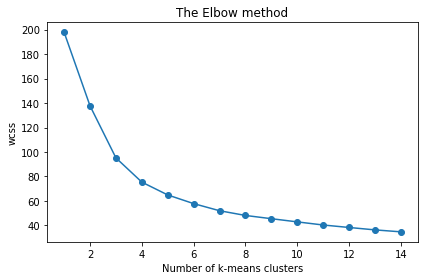

In [124]:
plt.plot(range(1, 15, 1), wcss, marker = "o")
plt.title("The Elbow method")
plt.xlabel("Number of k-means clusters")
plt.ylabel("wcss")
plt.tight_layout()
plt.show()

In [159]:
kclust = KMeans(5)
kclust = kclust.fit(HRA_hr.iloc[:, 1:6])
# kclust = kclust.transform(HRA_hr.iloc[:, 1:6])
# kclust = kmeans.fit_predict(HRA_hr.iloc[:, 1:6])

In [160]:
HRA_hr["kcluster"] = kclust.labels_
HRA_hr["kcluster"] = HRA_hr["kcluster"].astype("category")
HRA_hr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 739 entries, 32 to 14979
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   left          739 non-null    int32   
 1   satisfaction  739 non-null    float64 
 2   evaluation    739 non-null    float64 
 3   projects      739 non-null    float64 
 4   hours         739 non-null    float64 
 5   years         739 non-null    int64   
 6   accident      739 non-null    int32   
 7   promotion     739 non-null    int32   
 8   medium        739 non-null    int32   
 9   low           739 non-null    int32   
 10  hcluster      739 non-null    category
 11  kcluster      739 non-null    category
dtypes: category(2), float64(4), int32(5), int64(1)
memory usage: 51.1 KB


In [169]:
print(feature_kclust)
print(kclust.cluster_centers_)
print(kclust.score)

['satisfaction', 'evaluation', 'projects', 'hours', 'years']
[[0.69047619 0.57828728 0.31851852 0.47085372 2.        ]
 [0.5775076  0.59675785 0.37446809 0.56854677 6.25531915]
 [0.44298325 0.67291179 0.5147541  0.60690535 4.        ]
 [0.55400455 0.42428142 0.22642643 0.39561732 3.        ]
 [0.4756044  0.69820106 0.496      0.56251572 5.        ]]
<bound method KMeans.score of KMeans(n_clusters=5)>


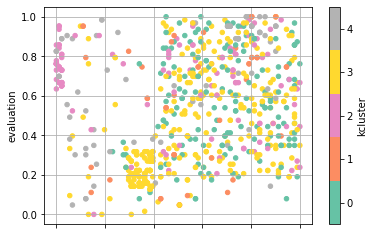

In [164]:
'''
[Error]
import matplotlib.pyplot as plt
label = kclust.fit_predict(HRA_hr.iloc[:, 1:5])

label_0 = HRA_hr[label == 0]
label_1 = HRA_hr[label == 1]
label_2 = HRA_hr[label == 2]
label_3 = HRA_hr[label == 3]
label_4 = HRA_hr[label == 4]

plt.scatter(label_0[cols[0]], label_0[cols[1]], color = 'red')
plt.scatter(label_1[cols[0]], label_1[cols[1]], color = 'blue')
plt.scatter(label_2[cols[0]], label_2[cols[1]], color = 'green')
plt.scatter(label_3[cols[0]], label_3[cols[1]], color = 'purple')
plt.scatter(label_4[cols[0]], label_4[cols[1]], color = 'orange')

centers = kclust.cluster_centers_
plt.grid()
'''

HRA_hr.plot.scatter("satisfaction", "evaluation", c = "kcluster", colormap = "Set2")
plt.grid()

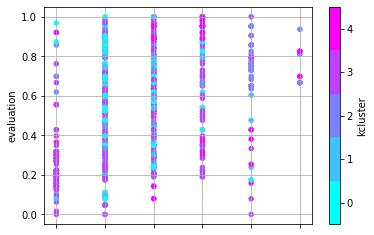

In [176]:
HRA_hr.plot.scatter('projects', 'evaluation', c = "kcluster", colormap = "cool")
plt.grid()

<AxesSubplot:xlabel='hours', ylabel='satisfaction'>

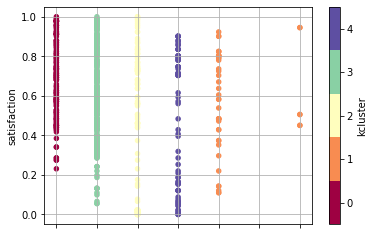

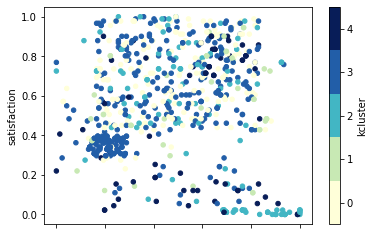

In [177]:
HRA_hr.plot.scatter('years', 'satisfaction', c = "kcluster", colormap = "Spectral")
plt.grid()
HRA_hr.plot.scatter('hours', 'satisfaction', c = "kcluster", colormap = "YlGnBu")


In [183]:
HRA_hr.groupby(["kcluster"], as_index = False).count()

,kcluster,left,satisfaction,evaluation,projects,hours,years,accident,promotion,medium,low,hcluster
0,0,162,162,162,162,162,162,162,162,162,162,162
1,1,47,47,47,47,47,47,47,47,47,47,47
2,2,122,122,122,122,122,122,122,122,122,122,122
3,3,333,333,333,333,333,333,333,333,333,333,333
4,4,75,75,75,75,75,75,75,75,75,75,75


In [184]:
HRA_hr.groupby(["hcluster"], as_index = False).count()

,hcluster,left,satisfaction,evaluation,projects,hours,years,accident,promotion,medium,low,kcluster
0,0,17,17,17,17,17,17,17,17,17,17,17
1,1,117,117,117,117,117,117,117,117,117,117,117
2,2,27,27,27,27,27,27,27,27,27,27,27
3,3,86,86,86,86,86,86,86,86,86,86,86
4,4,87,87,87,87,87,87,87,87,87,87,87
5,5,91,91,91,91,91,91,91,91,91,91,91
6,6,65,65,65,65,65,65,65,65,65,65,65
7,7,110,110,110,110,110,110,110,110,110,110,110
8,8,139,139,139,139,139,139,139,139,139,139,139
